# Import Libraries

In [11]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# instruction to Jupyter to inline all the visualizations
%matplotlib inline 

#import io
from sagemaker import get_execution_role
#import os

# Amazon SageMaker Python SDK
#import sagemaker.amazon.common as smac 
#import sagemaker


# Data Ingestion

In [2]:
s3 = boto3.resource('s3')
# listing buckets
! aws s3 ls

2020-07-08 14:19:03 ml-social-good
2020-07-29 20:34:00 sagemaker-studio-450833512273-ih5i5zyafym


In [3]:
# show files in bucket for hackathon
! aws s3 ls ml-social-good/covid19-hackathon/ --recursive

2020-07-29 05:44:05          0 covid19-hackathon/
2020-07-29 05:44:35     623708 covid19-hackathon/Foursquare COVID-19 Data National + Regional_July 17 2020.xlsx
2020-07-29 14:14:29      11666 covid19-hackathon/HGHI_hospital-capacity-by-state-20-population-contracted.csv
2020-07-29 13:53:34    1900246 covid19-hackathon/covid_tracking_project/202007282000/covid_tracking_project_daily_us_states_202007282000.csv
2020-07-29 05:44:35    1336975 covid19-hackathon/diagnosis-of-covid-19-and-its-clinical-spectrum.csv
2020-07-30 17:06:48   93151429 covid19-hackathon/google-covid-19-reports/dataset/google-covid-19-reports.csv
2020-07-29 05:44:36      38191 covid19-hackathon/nyt-states-reopen-status-covid-19/dataset/nyt-states-reopen-status-covid-19.csv


In [4]:
role = get_execution_role()

#The COVID Tracking Project - Daily U.S. State Testing Statistics (AWS Data Exchange)
# daily covid pos/neg tests, hospitalized, ICU, ventilators, recovered, deaths by state 

input_bucket = 'ml-social-good/covid19-hackathon/covid_tracking_project/202007282000'
in_data_key = 'covid_tracking_project_daily_us_states_202007282000.csv'
training_data_location = 's3://{}/{}'.format(input_bucket, in_data_key)

daily_by_state_covid_df = pd.read_csv(training_data_location)
print('uploaded training data from location: {}'.format(training_data_location))

uploaded training data from location: s3://ml-social-good/covid19-hackathon/covid_tracking_project/202007282000/covid_tracking_project_daily_us_states_202007282000.csv


In [ ]:
# Comment this out if using in AWS
#file_path = "https://raw.githubusercontent.com/dinhhn/wwcode-aws-hackathon/master/data/covid_tracking_project_daily_us_states_202007282000.csv"
#daily_by_state_covid_df = pd.read_csv(file_path)

In [17]:
# Harvard Global Health Institute COVID-19 Hospital Capacity Estimates 2020
# https://globalepidemics.org/hospital-capacity/
# https://www.kaggle.com/roche-data-science-coalition/uncover/data?
# number of hospital bed, ICU beds, adult population, population 65+ by state
input_bucket = 'ml-social-good/covid19-hackathon'
in_data_key = 'HGHI_hospital-capacity-by-state-20-population-contracted.csv'
training_data_location = 's3://{}/{}'.format(input_bucket, in_data_key)

state_capacity_df = pd.read_csv(training_data_location)
print('uploaded training data from location: {}'.format(training_data_location))

uploaded training data from location: s3://ml-social-good/covid19-hackathon/HGHI_hospital-capacity-by-state-20-population-contracted.csv


In [ ]:
# Comment this out if using in AWS
#file_path = "https://raw.githubusercontent.com/dinhhn/wwcode-aws-hackathon/master/data/HGHI_hospital-capacity-by-state-20-population-contracted.csv"
#state_capacity_df = pd.read_csv(file_path)

# Data Inspection & Visualization

In [6]:
# show row, column size
daily_by_state_covid_df.shape

(8081, 41)

In [7]:
# show first 5 rows
daily_by_state_covid_df.head()

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,...,positive_negative,death_increase,hospitalized_increase,hash,commercialscore,negativeregularscore,negativescore,positivescore,score,grade
0,2020-07-27,AK,3206.0,204162.0,NaN,38.0,NaN,NaN,NaN,3.0,...,207368,1,0,de28ff6d7d2874c791219904c2fa81f83142a78f,0,0,0,0,0,NaN
1,2020-07-27,AL,81115.0,576844.0,NaN,1599.0,9694.0,NaN,1081.0,NaN,...,657959,18,537,906fddfa88864f88bdf0d2bcb19cf267a406f2e6,0,0,0,0,0,NaN
2,2020-07-27,AR,39447.0,445444.0,NaN,489.0,2624.0,NaN,NaN,110.0,...,484891,7,82,819db85fb84f50809d492ae373ea4914e01077f0,0,0,0,0,0,NaN
3,2020-07-27,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,e2900aeb060df366a3f3a70300dccec3b2e33ae8,0,0,0,0,0,NaN
4,2020-07-27,AZ,163827.0,714506.0,NaN,2626.0,7751.0,820.0,NaN,567.0,...,878333,-1,45,11d6f676a2f3a2381d94968e48b3b0b447284a05,0,0,0,0,0,NaN


In [8]:
# show last 5 rows
daily_by_state_covid_df.tail()

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,...,positive_negative,death_increase,hospitalized_increase,hash,commercialscore,negativeregularscore,negativescore,positivescore,score,grade
8076,2020-01-26,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,7acb526e14f20a29cc74a0b32a37328bc6eac6c2,0,0,0,0,0,NaN
8077,2020-01-25,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,9b52ca94dd2a996822542ea5f17a7363e7ad91cf,0,0,0,0,0,NaN
8078,2020-01-24,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,094154f68e74bfc30b977cdee888f9c07be4360e,0,0,0,0,0,NaN
8079,2020-01-23,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,e16af2a6a8f060355ff5ba499a28309a262c0b1e,0,0,0,0,0,NaN
8080,2020-01-22,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0,0,8f8db794931706272489cddd51e917a4a69c8c9b,0,0,0,0,0,NaN


In [9]:
# Check date range
daily_by_state_covid_df.date.unique()

array(['2020-07-27', '2020-07-26', '2020-07-25', '2020-07-24',
       '2020-07-23', '2020-07-22', '2020-07-21', '2020-07-20',
       '2020-07-19', '2020-07-18', '2020-07-17', '2020-07-16',
       '2020-07-15', '2020-07-14', '2020-07-13', '2020-07-12',
       '2020-07-11', '2020-07-10', '2020-07-09', '2020-07-08',
       '2020-07-07', '2020-07-06', '2020-07-05', '2020-07-04',
       '2020-07-03', '2020-07-02', '2020-07-01', '2020-06-30',
       '2020-06-29', '2020-06-28', '2020-06-27', '2020-06-26',
       '2020-06-25', '2020-06-24', '2020-06-23', '2020-06-22',
       '2020-06-21', '2020-06-20', '2020-06-19', '2020-06-18',
       '2020-06-17', '2020-06-16', '2020-06-15', '2020-06-14',
       '2020-06-13', '2020-06-12', '2020-06-11', '2020-06-10',
       '2020-06-09', '2020-06-08', '2020-06-07', '2020-06-06',
       '2020-06-05', '2020-06-04', '2020-06-03', '2020-06-02',
       '2020-06-01', '2020-05-31', '2020-05-30', '2020-05-29',
       '2020-05-28', '2020-05-27', '2020-05-26', '2020-

In [10]:
# Check state values
daily_by_state_covid_df.state.unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [12]:
# get stats on number in ICU
daily_by_state_covid_df['in_icu_currently'].describe()

count    2802.000000
mean      379.125268
std       653.614340
min         0.000000
25%        64.000000
50%       150.000000
75%       363.750000
max      5225.000000
Name: in_icu_currently, dtype: float64

In [13]:
# show rows where in_icu_currently is not na 
daily_by_state_covid_df[daily_by_state_covid_df['in_icu_currently'].notna()]

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,...,positive_negative,death_increase,hospitalized_increase,hash,commercialscore,negativeregularscore,negativescore,positivescore,score,grade
4,2020-07-27,AZ,163827.0,714506.0,NaN,2626.0,7751.0,820.0,NaN,567.0,...,878333,-1,45,11d6f676a2f3a2381d94968e48b3b0b447284a05,0,0,0,0,0,NaN
5,2020-07-27,CA,460550.0,6836028.0,NaN,8820.0,NaN,2284.0,NaN,NaN,...,7296578,29,0,b8931466ea5a52fb64e1683aec4d3e4c412f1f7e,0,0,0,0,0,NaN
8,2020-07-27,DC,11858.0,162290.0,NaN,102.0,NaN,20.0,NaN,8.0,...,174148,1,0,8939cbbc34669697daaaf02647f8c98a1c896dcb,0,0,0,0,0,NaN
9,2020-07-27,DE,14406.0,158653.0,NaN,63.0,NaN,18.0,NaN,NaN,...,173059,0,0,8cfbf195a852a83b67e4ca4024bf70b08bfa12b5,0,0,0,0,0,NaN
14,2020-07-27,IA,42554.0,412291.0,NaN,241.0,NaN,78.0,NaN,32.0,...,454845,6,0,0774997416210aab1bf46962e23d2d3767eaa56d,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,2020-03-27,CA,3879.0,17380.0,57400.0,746.0,NaN,200.0,NaN,NaN,...,21259,13,0,7a3946e57f5ffc51ce5c902d36ab4c253aa28d2c,0,0,0,0,0,NaN
6869,2020-03-27,NY,44635.0,101118.0,NaN,6481.0,8732.0,1583.0,NaN,NaN,...,145753,134,1811,e2f4cf0319002bd1a233eac6180a2ba2132d3fa0,0,0,0,0,0,NaN
6875,2020-03-27,RI,248.0,2502.0,138.0,28.0,NaN,9.0,NaN,6.0,...,2750,0,0,50c3bcb6ee44af73fa6203c6af20a276327e10fb,0,0,0,0,0,NaN
6925,2020-03-26,NY,37258.0,84846.0,NaN,5327.0,6921.0,1290.0,NaN,NaN,...,122104,100,1795,3e0028c05c110ad74e6daa7377baaaa6e9654ff4,0,0,0,0,0,NaN


In [14]:
# return list of distinct state values
daily_by_state_covid_df['state'].drop_duplicates()

0     AK
1     AL
2     AR
3     AS
4     AZ
5     CA
6     CO
7     CT
8     DC
9     DE
10    FL
11    GA
12    GU
13    HI
14    IA
15    ID
16    IL
17    IN
18    KS
19    KY
20    LA
21    MA
22    MD
23    ME
24    MI
25    MN
26    MO
27    MP
28    MS
29    MT
30    NC
31    ND
32    NE
33    NH
34    NJ
35    NM
36    NV
37    NY
38    OH
39    OK
40    OR
41    PA
42    PR
43    RI
44    SC
45    SD
46    TN
47    TX
48    UT
49    VA
50    VI
51    VT
52    WA
53    WI
54    WV
55    WY
Name: state, dtype: object

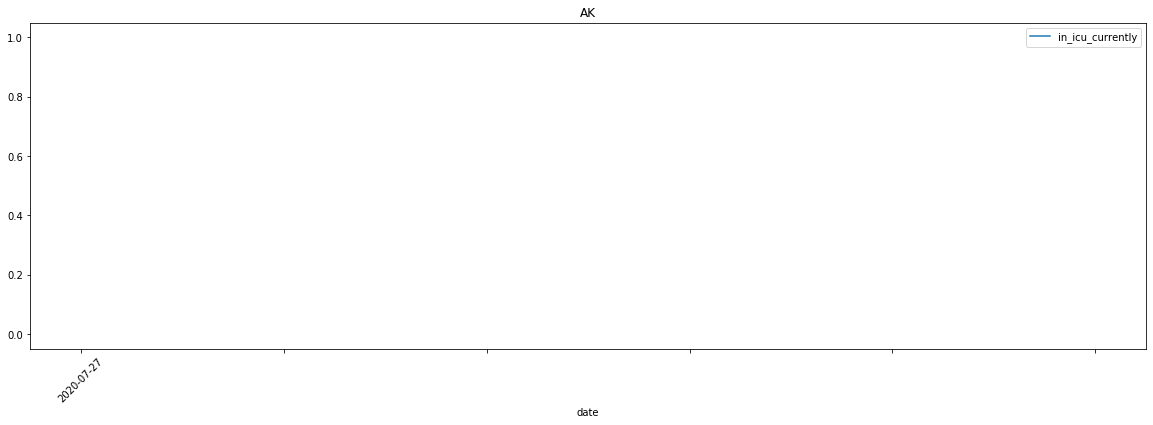

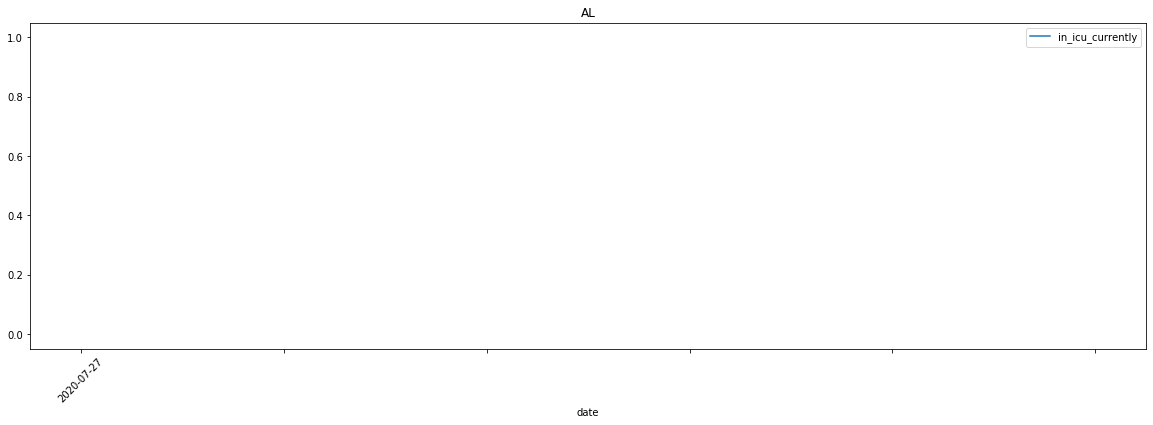

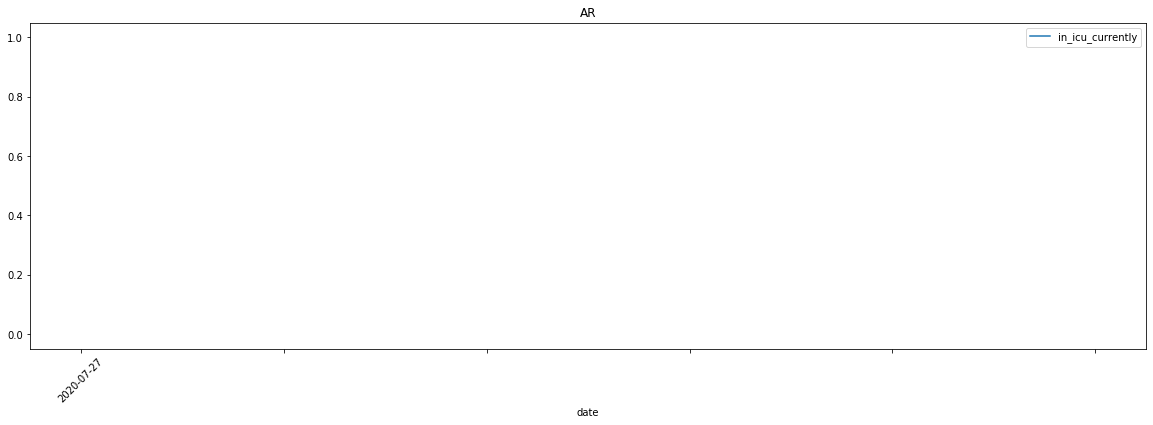

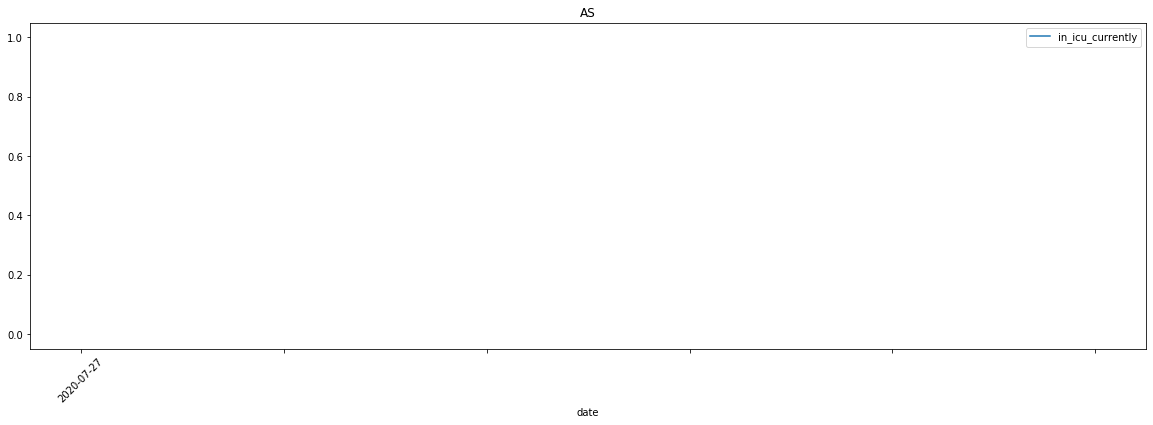

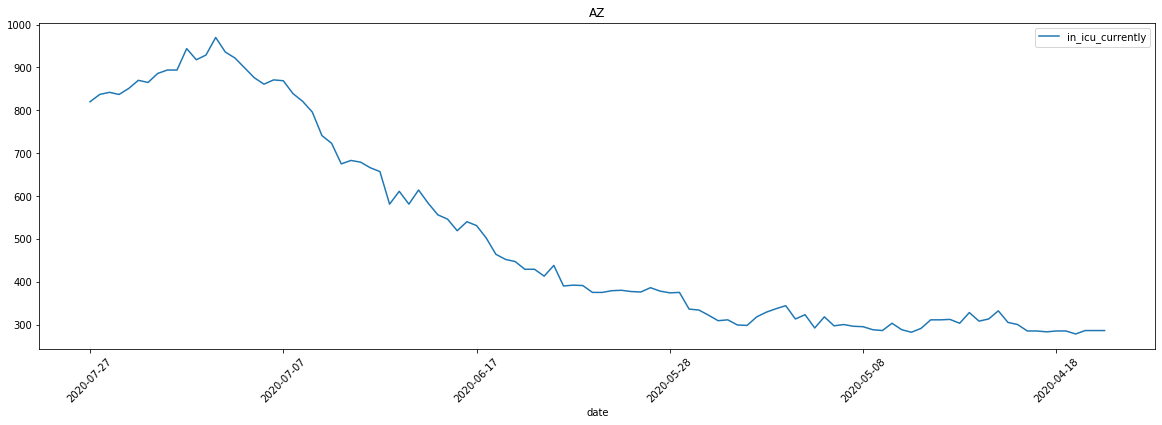

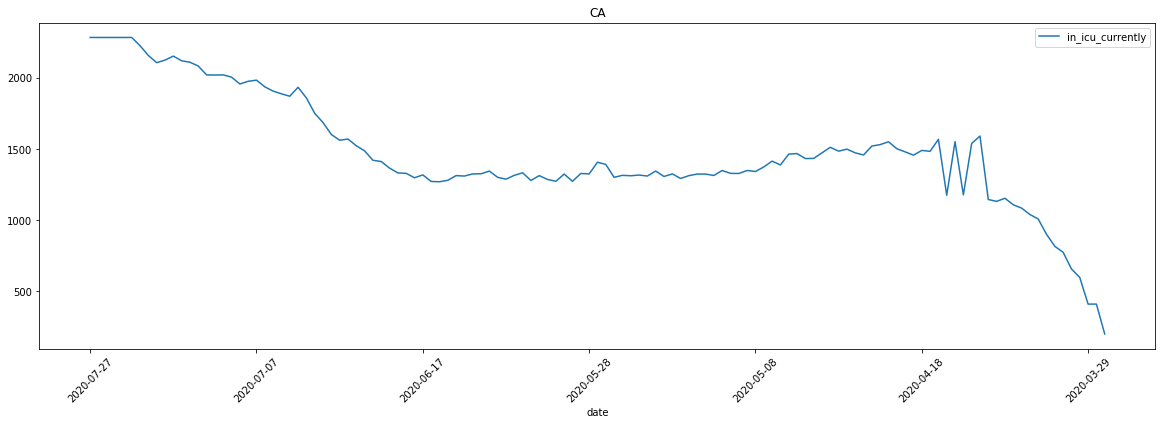

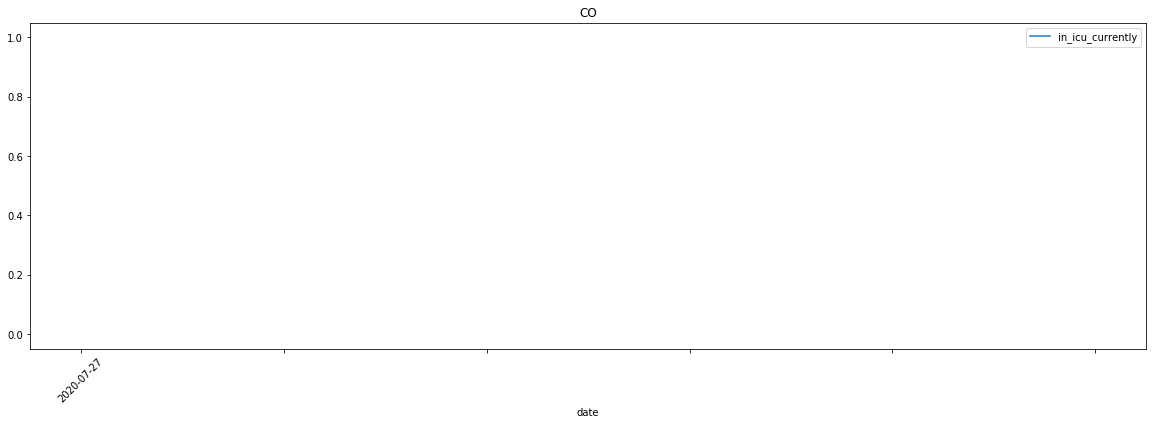

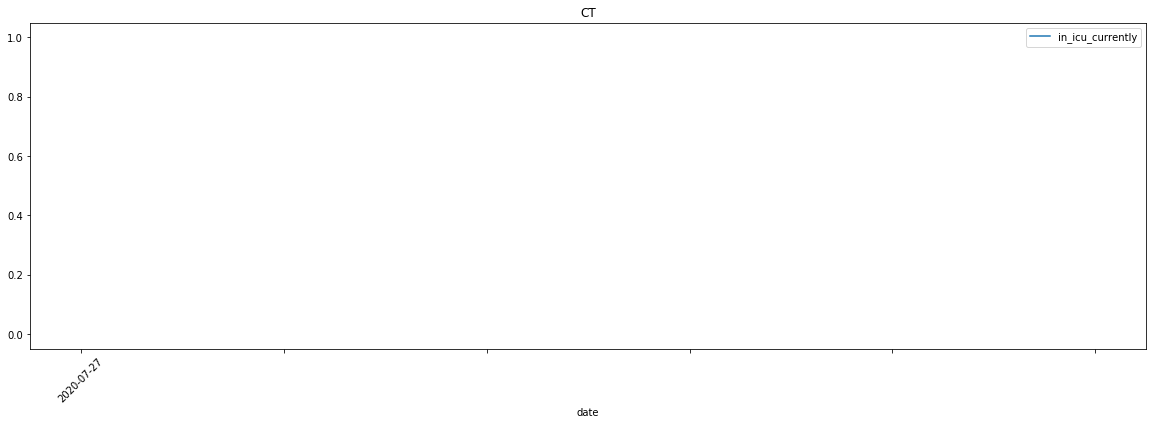

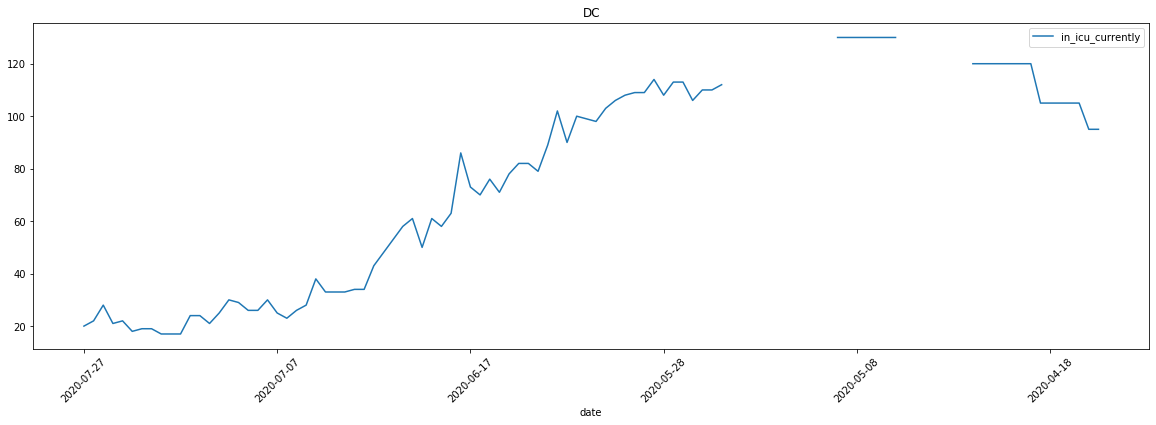

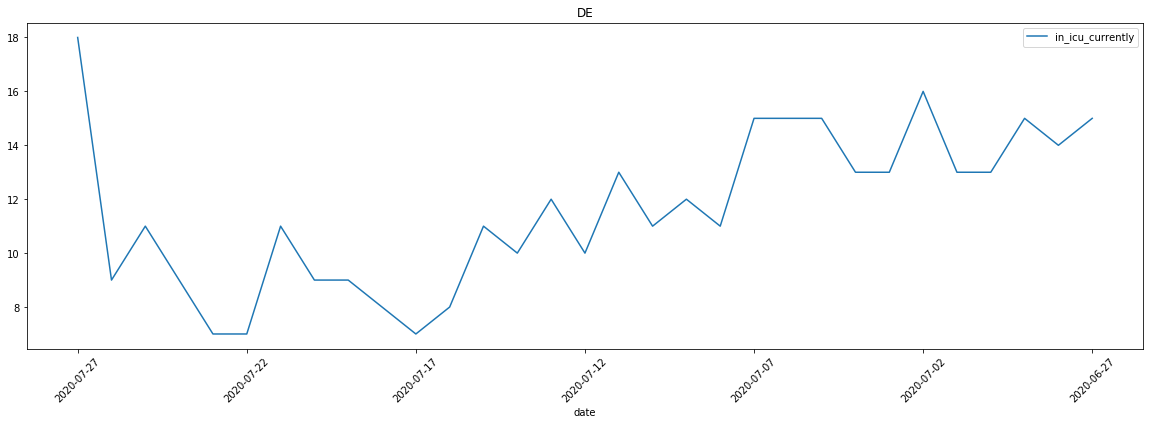

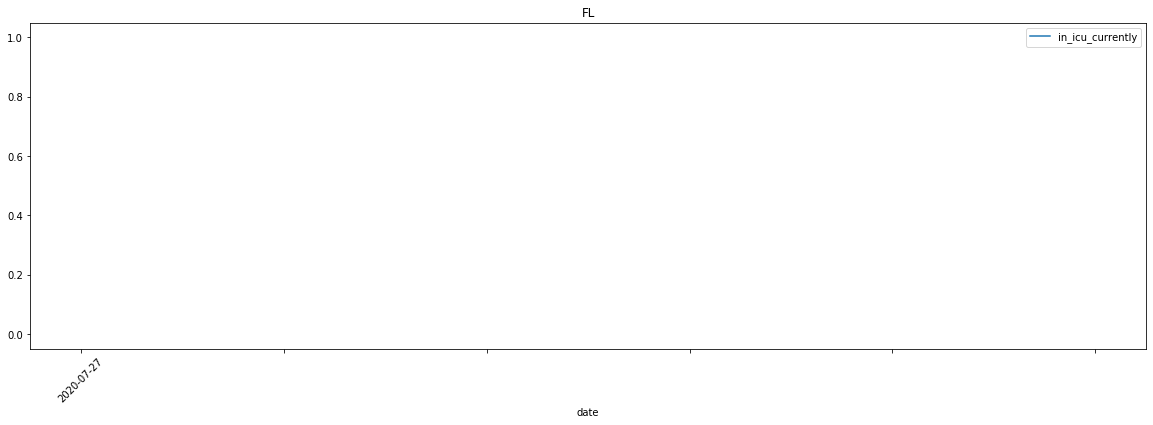

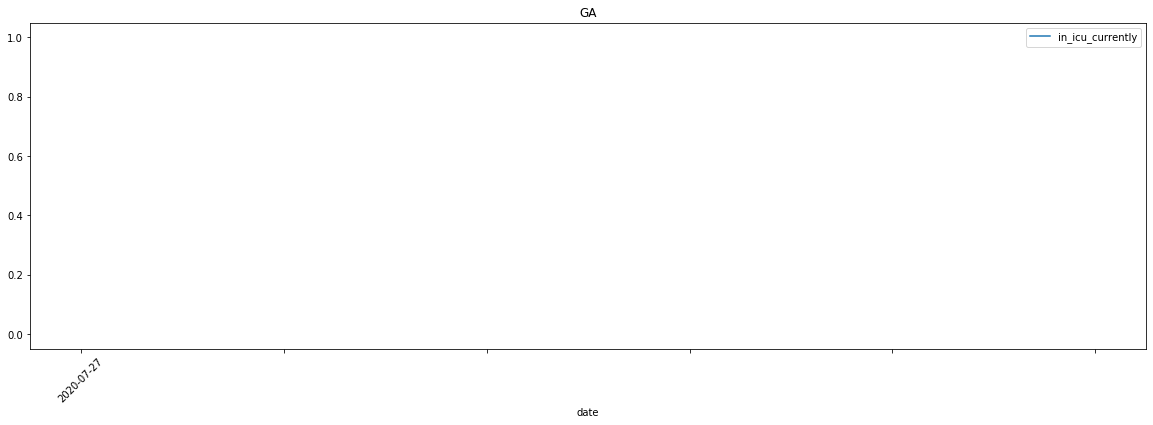

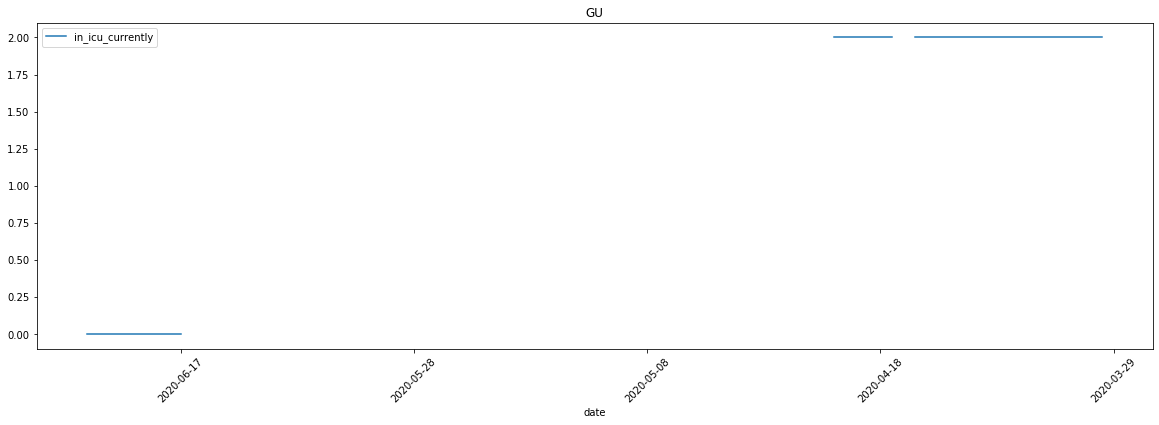

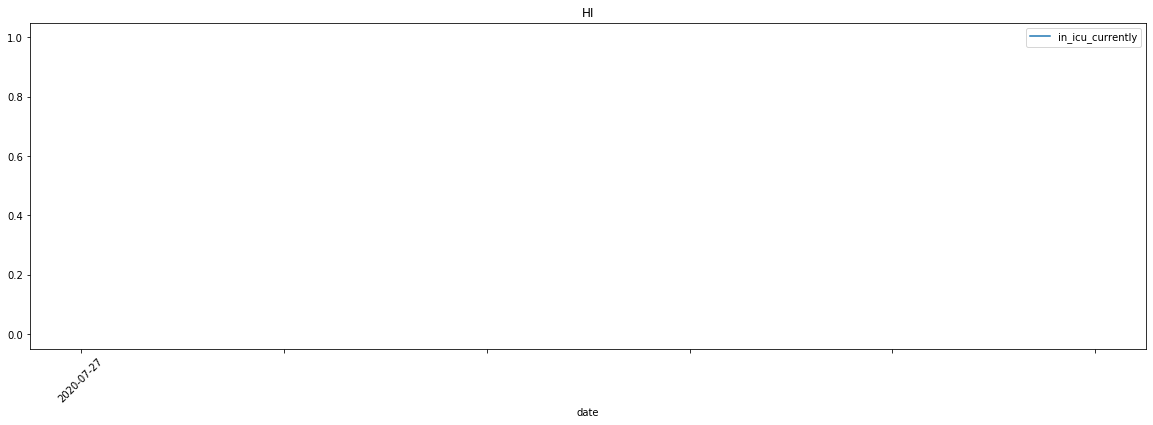

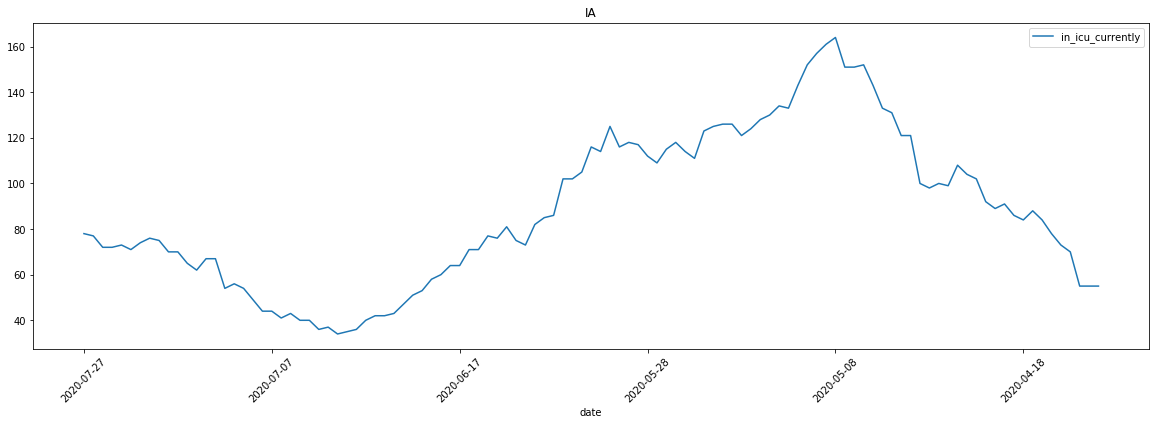

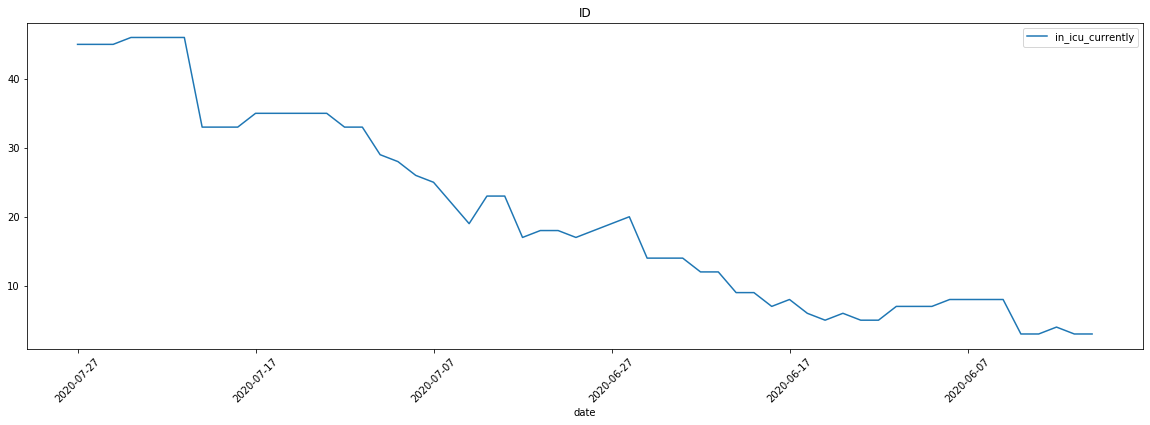

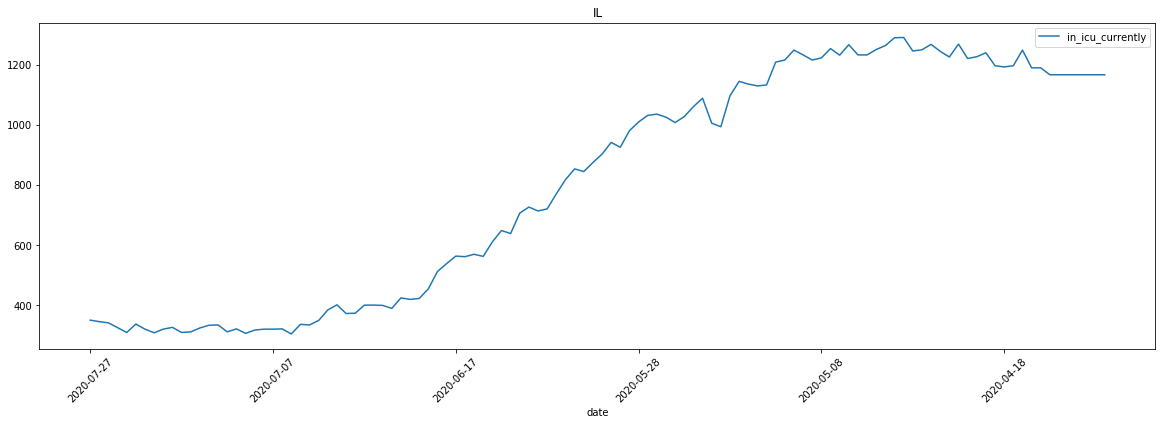

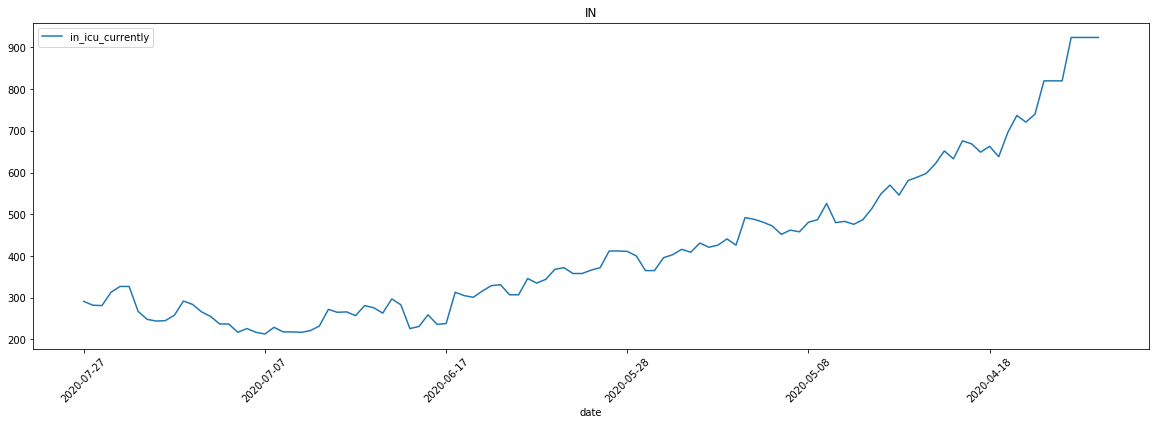

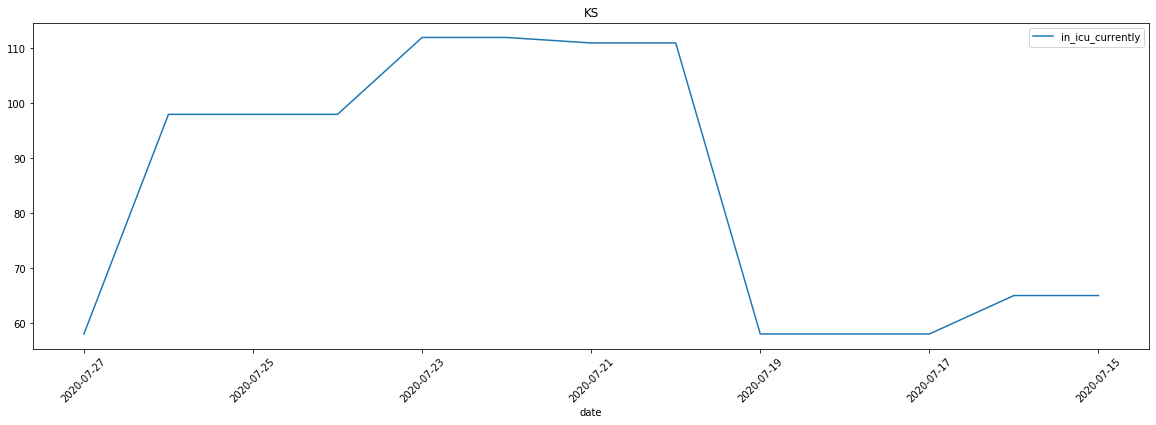

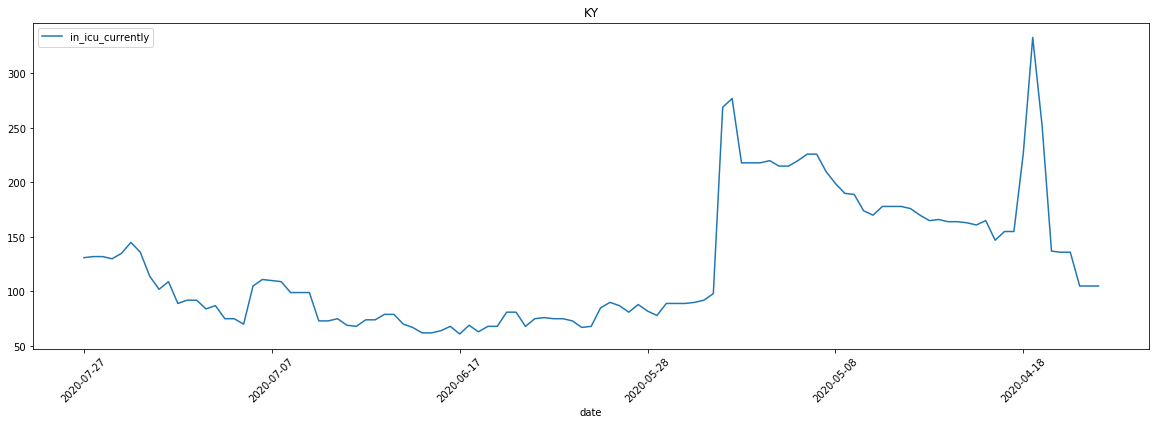

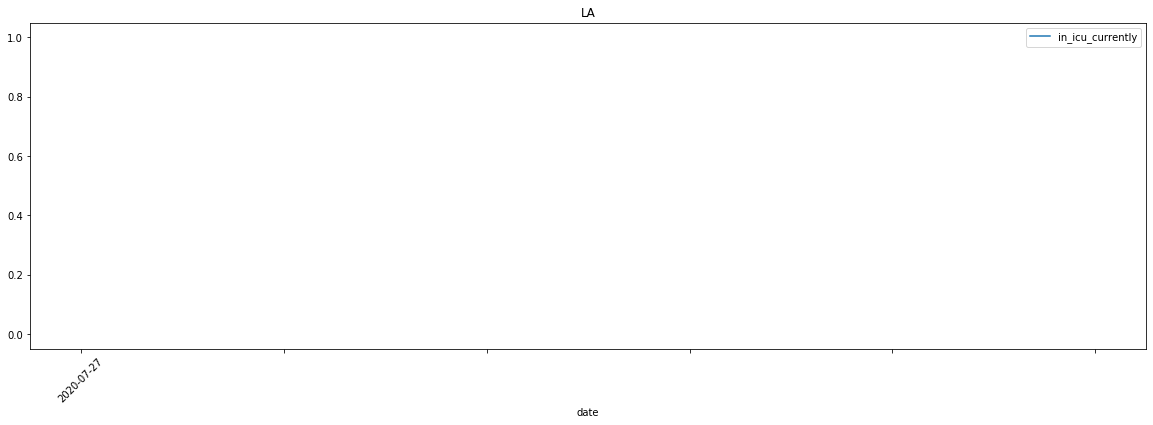

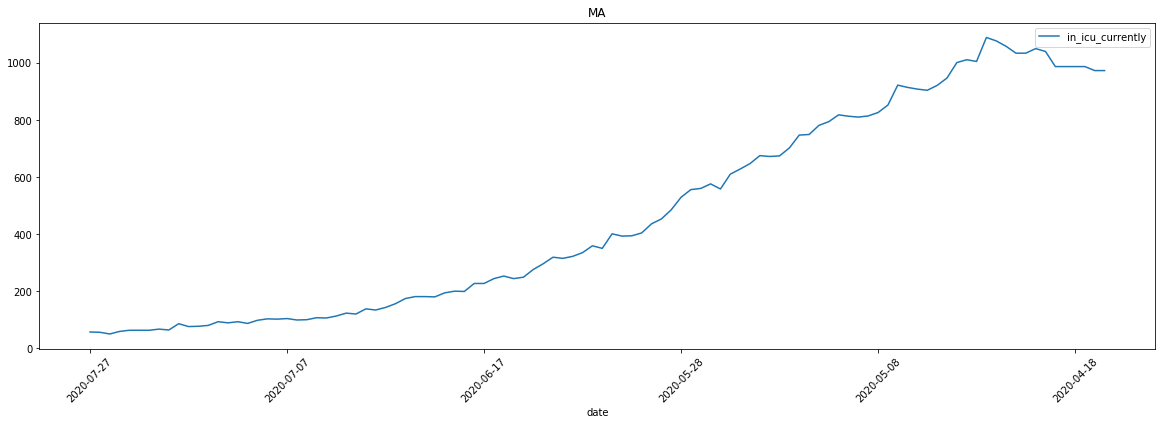

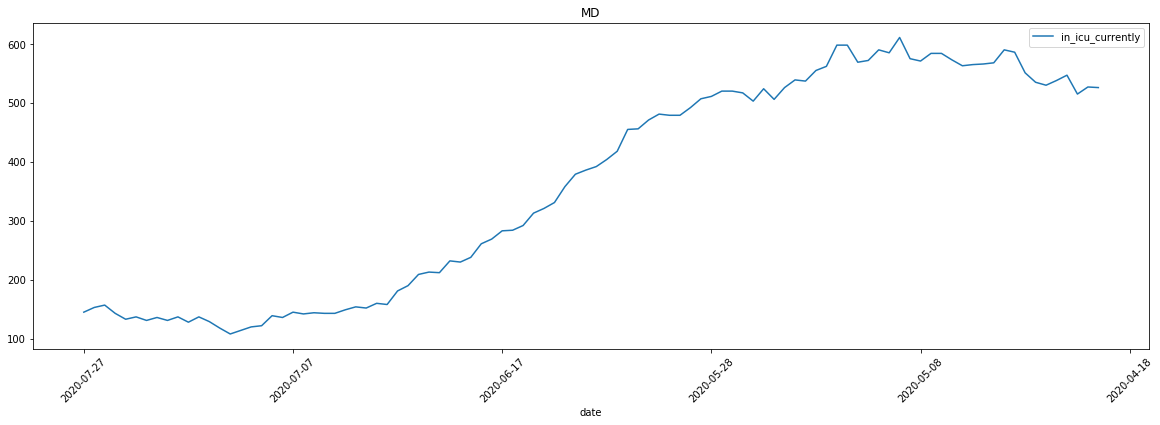

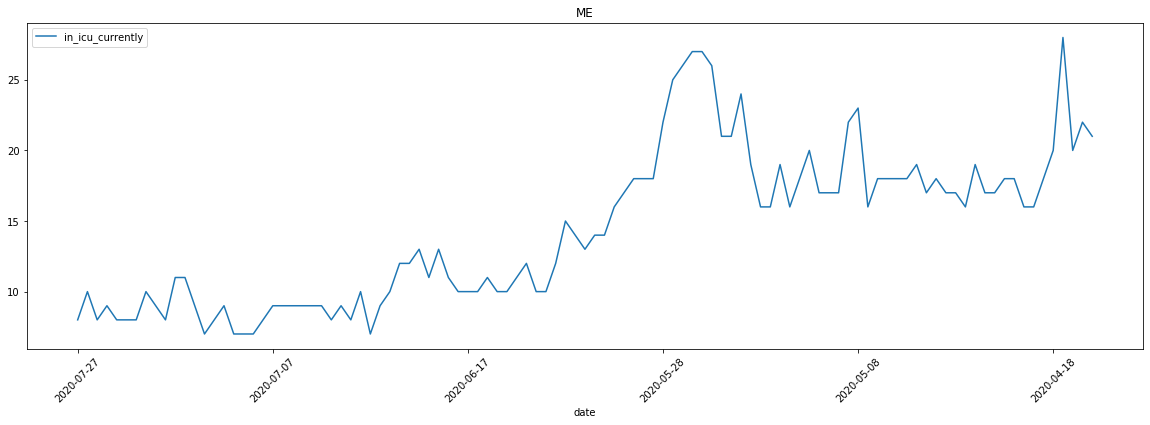

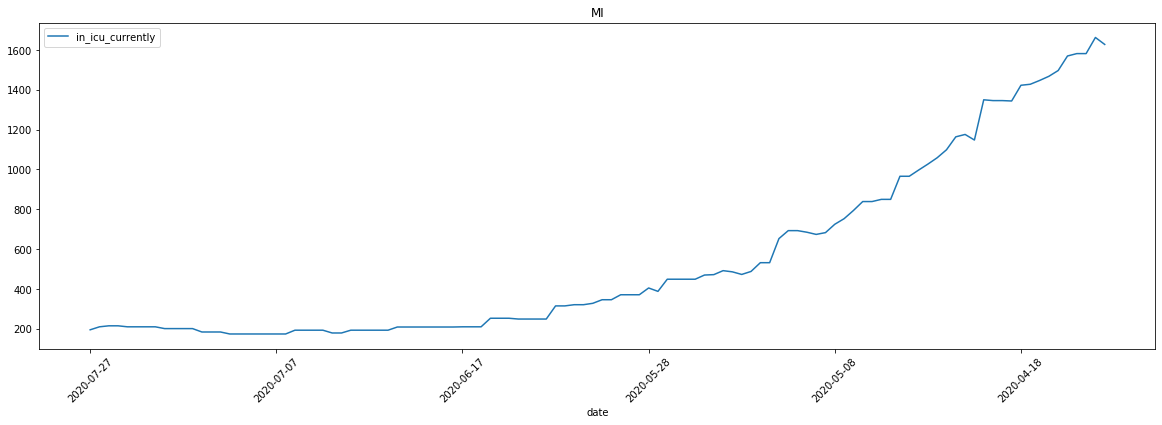

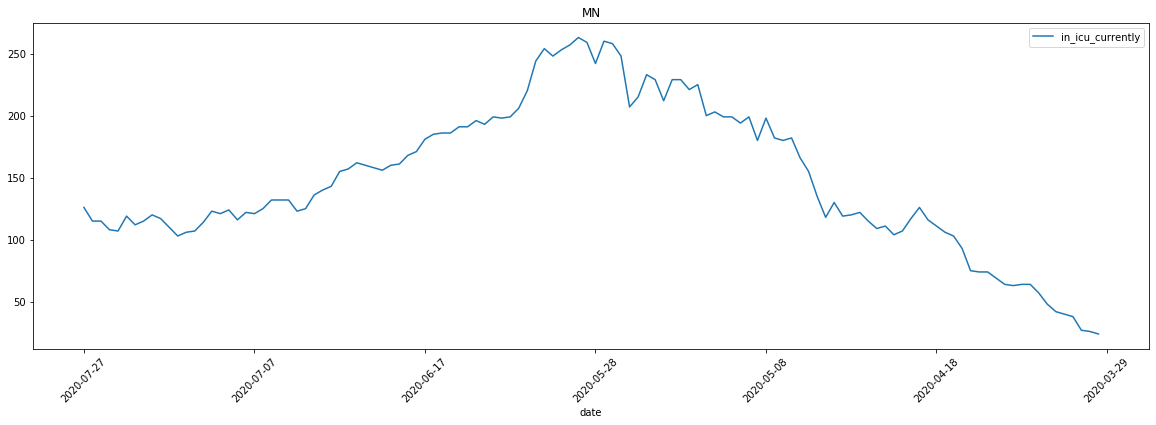

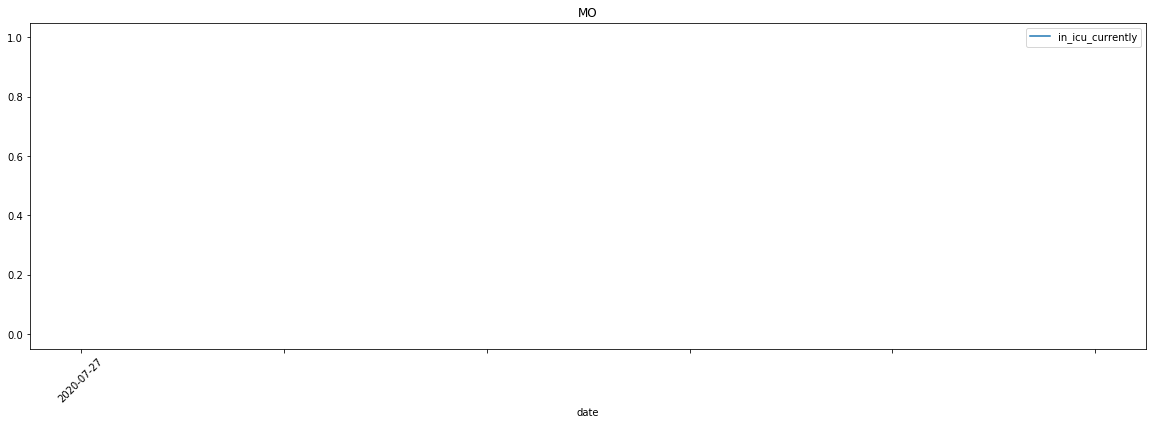

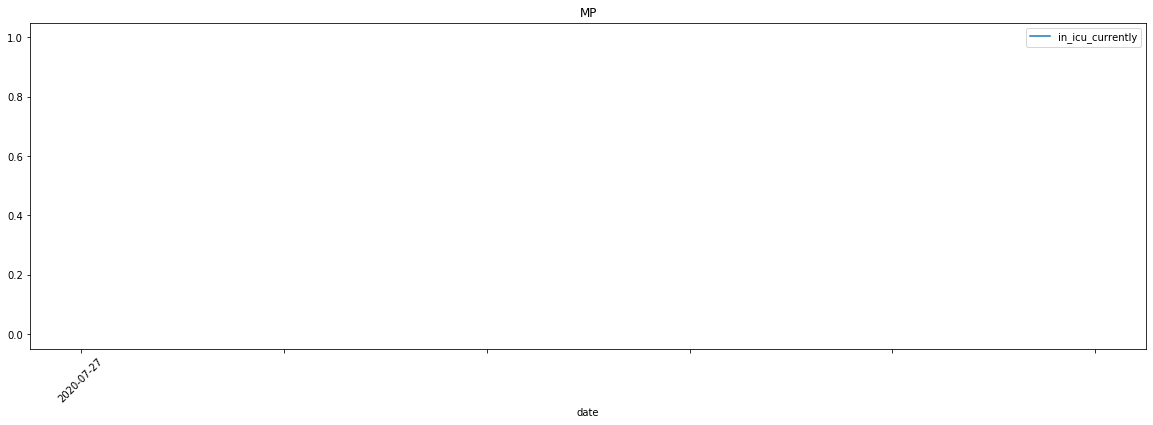

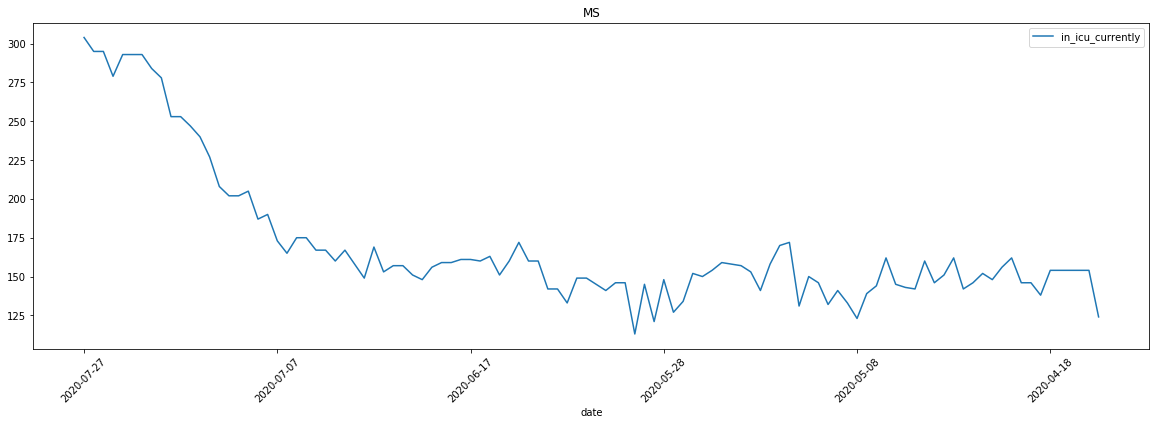

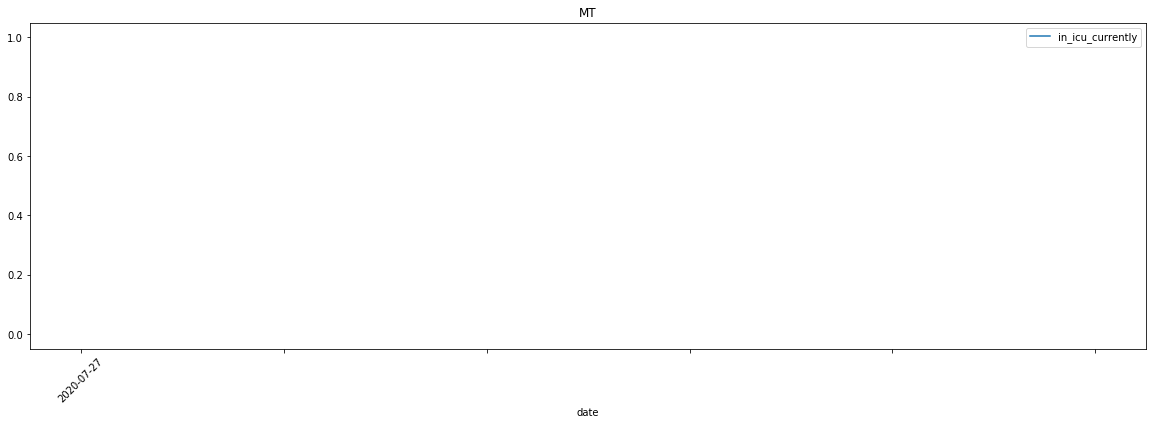

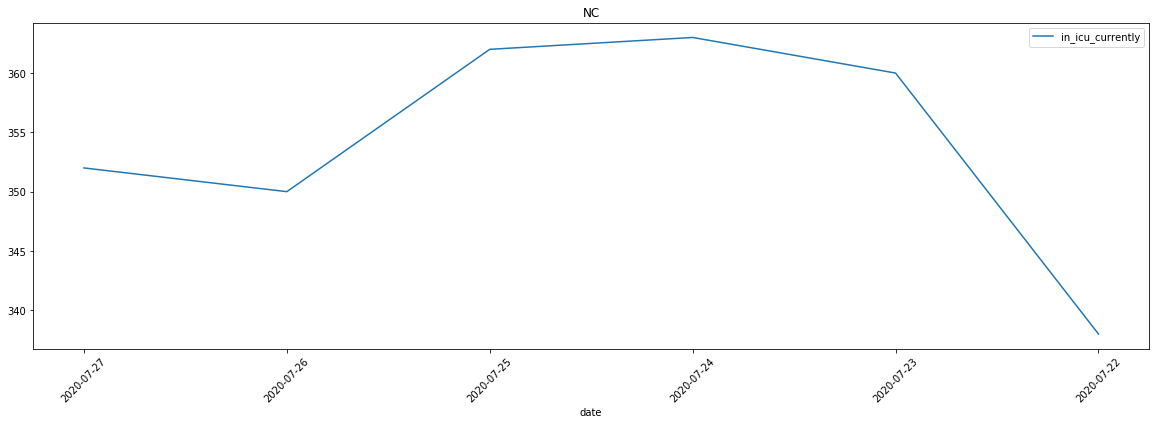

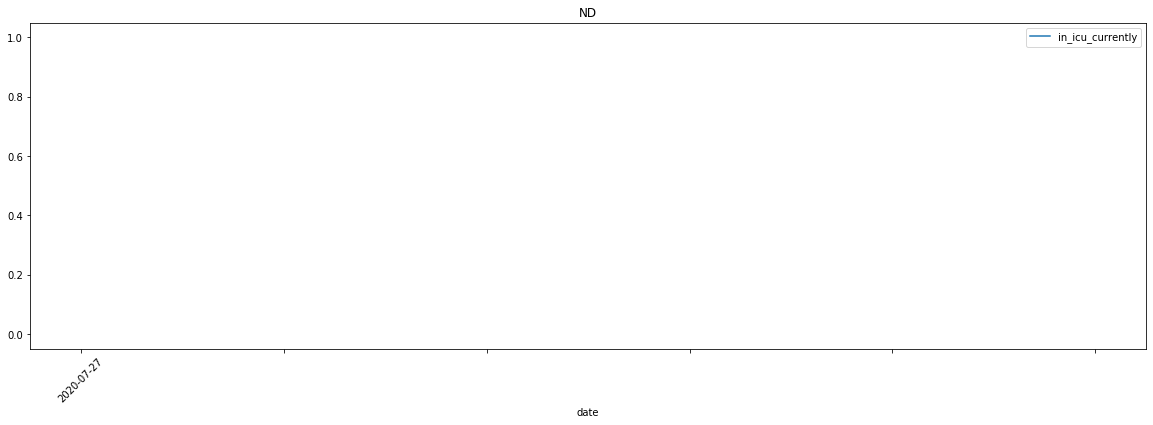

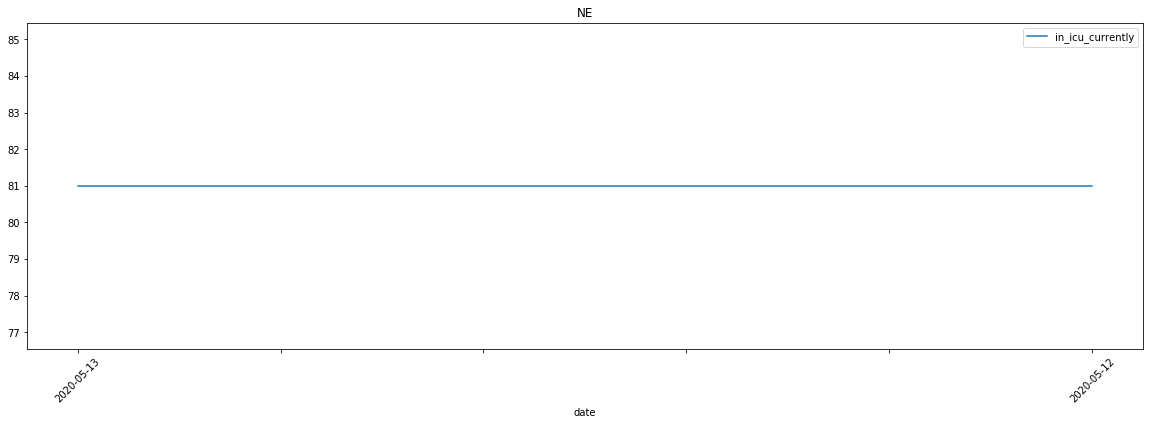

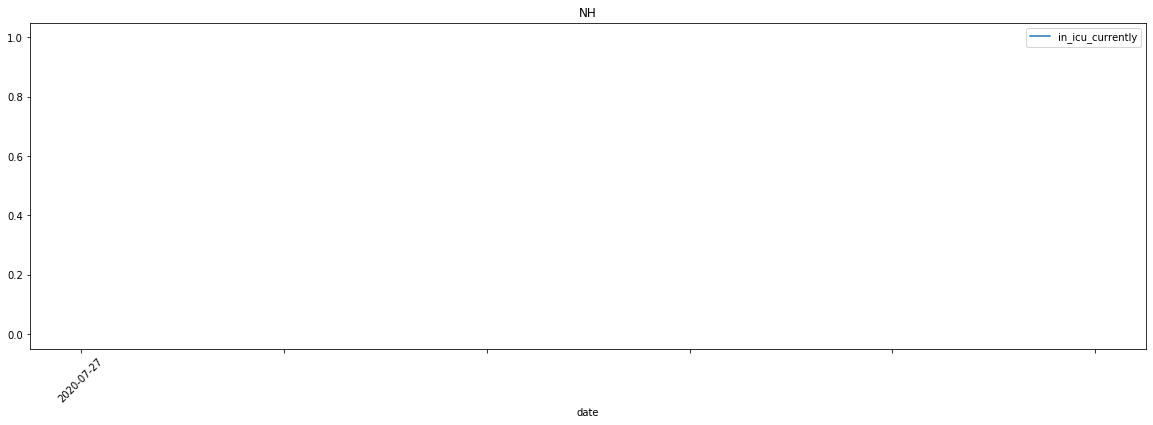

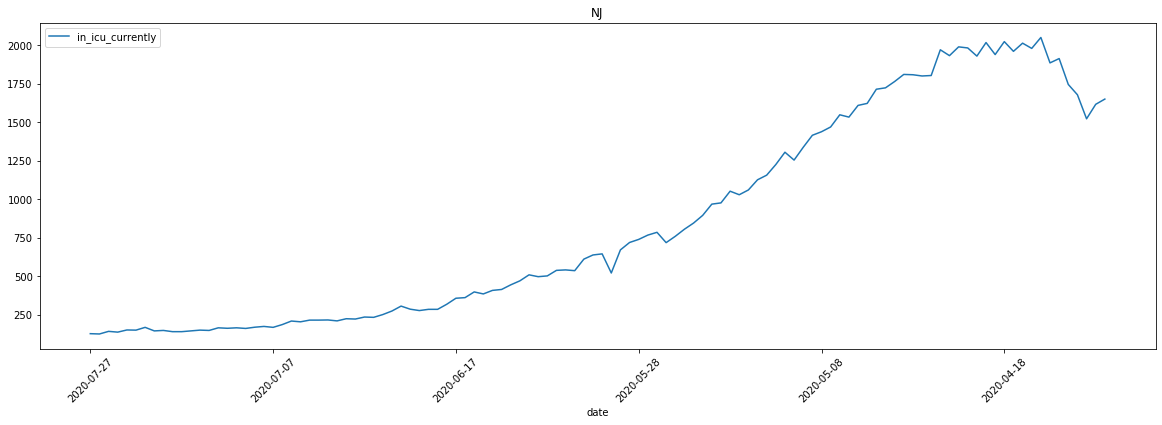

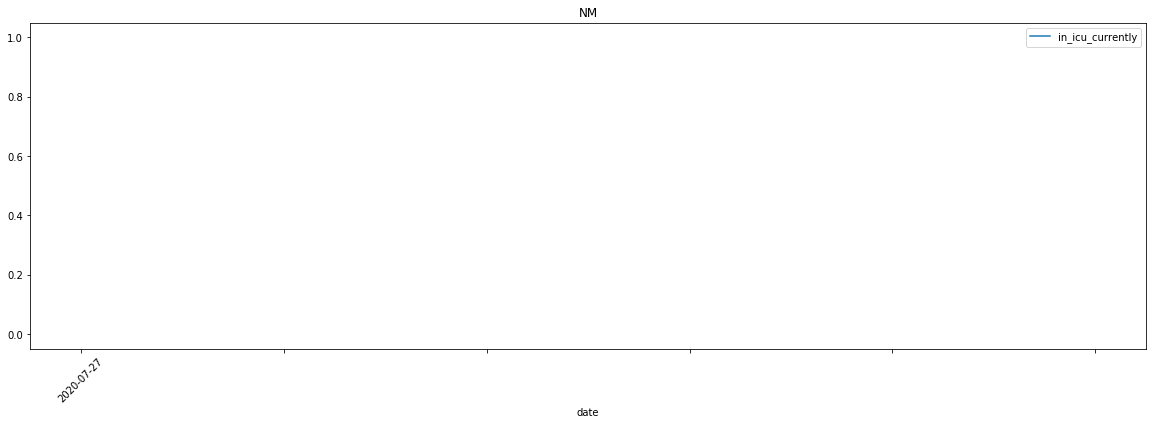

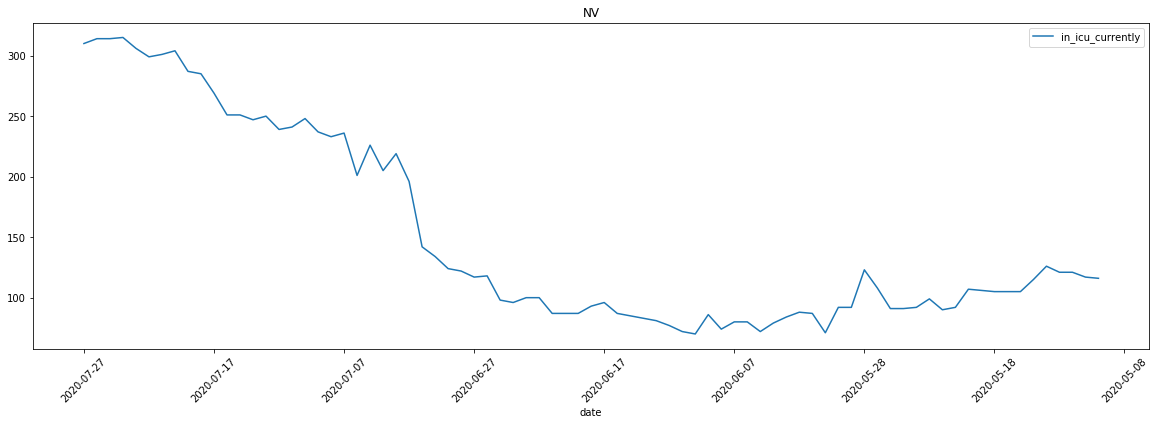

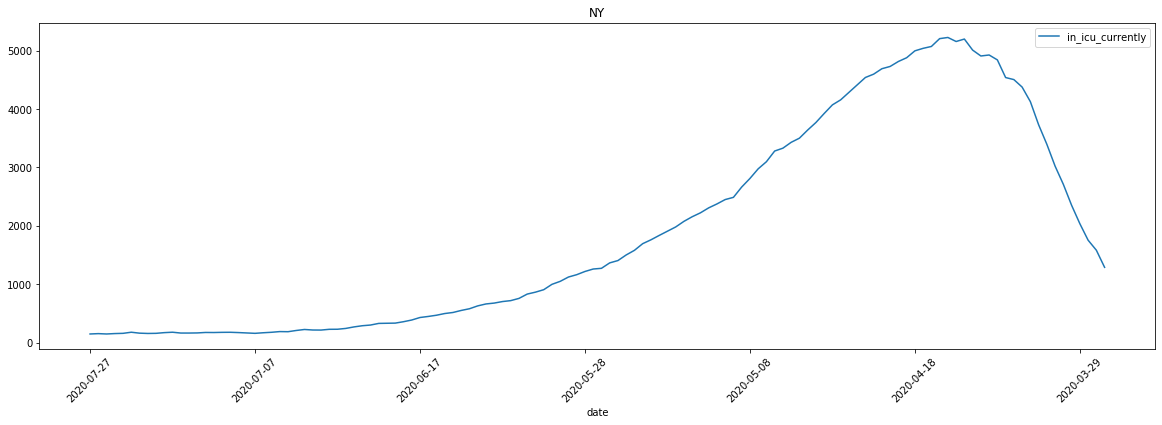

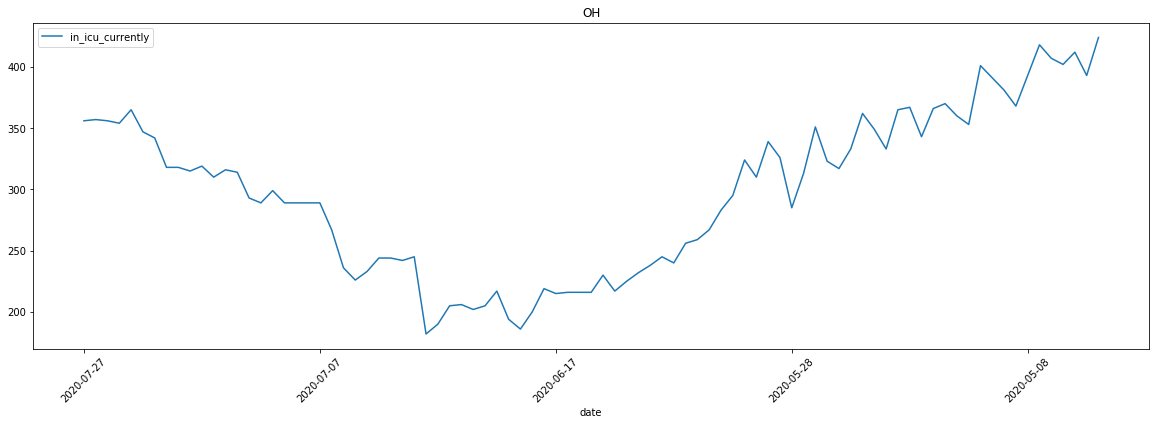

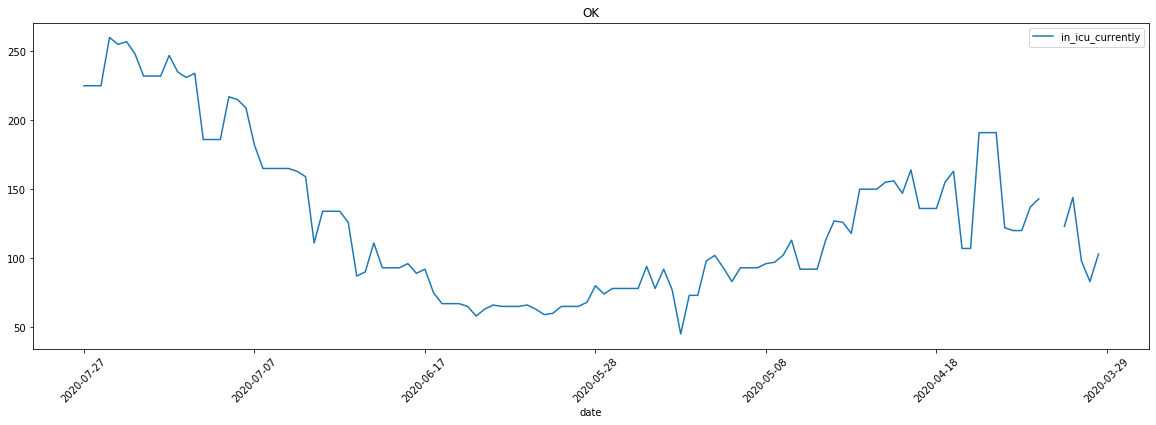

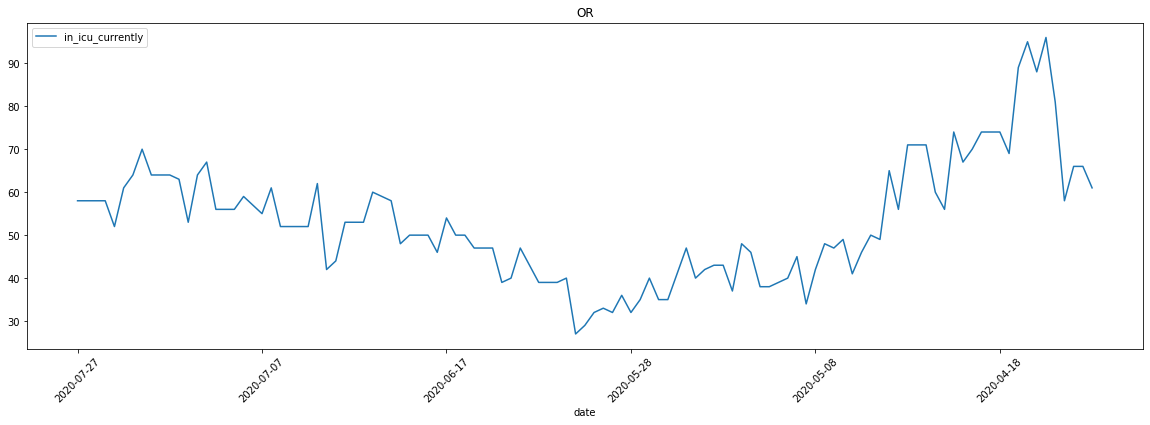

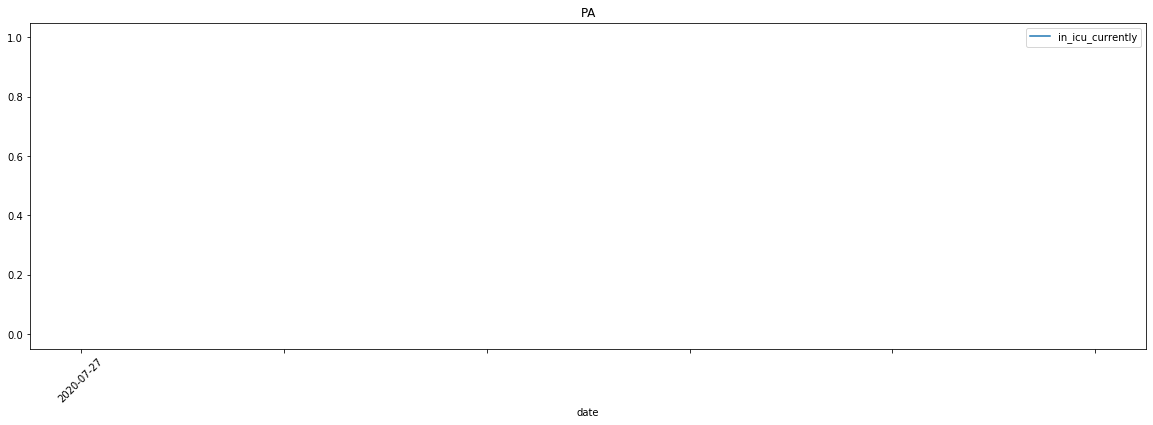

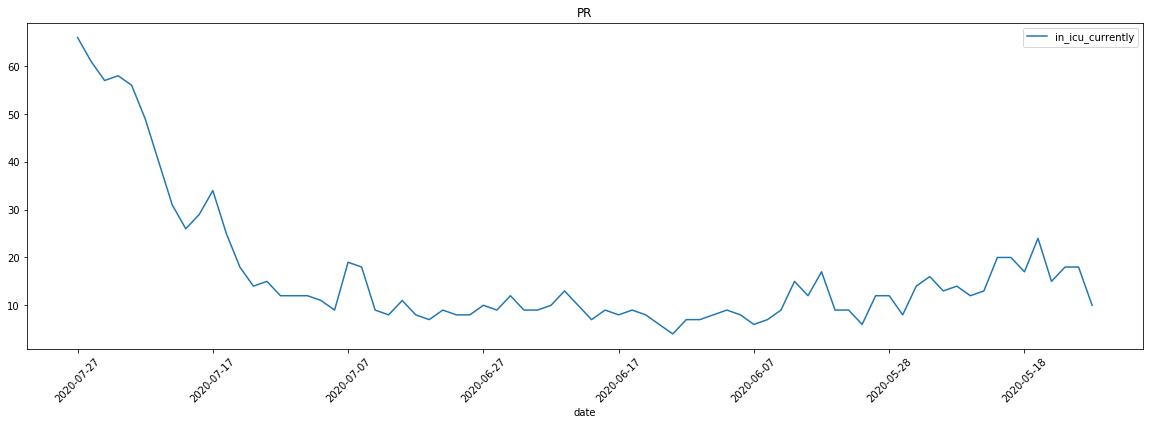

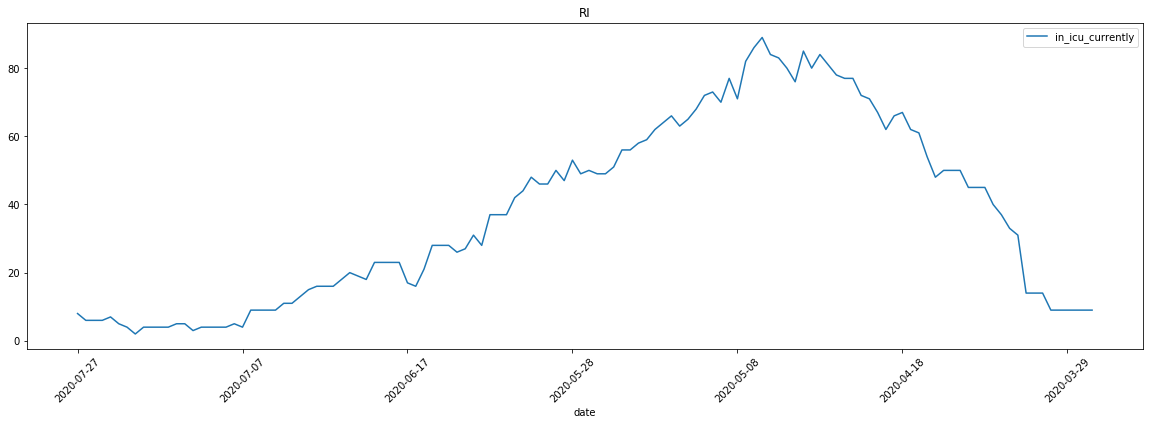

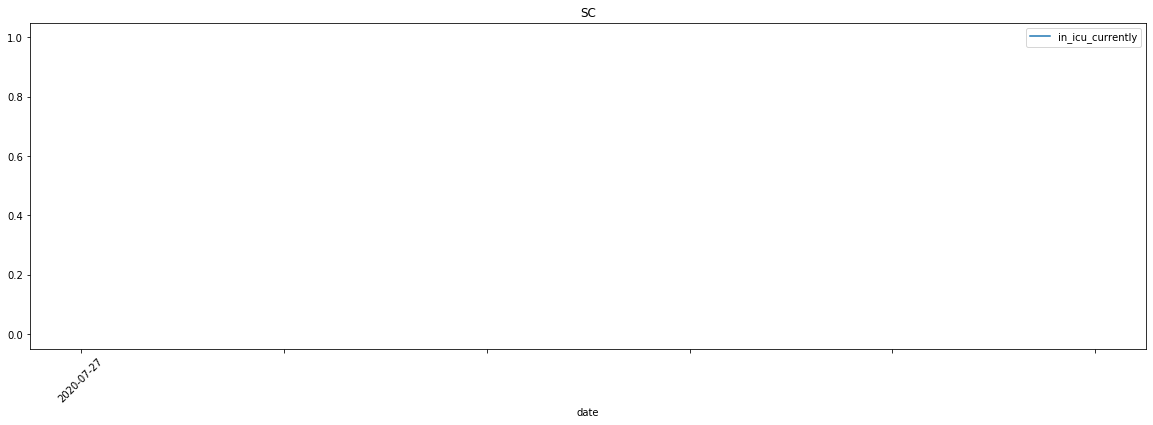

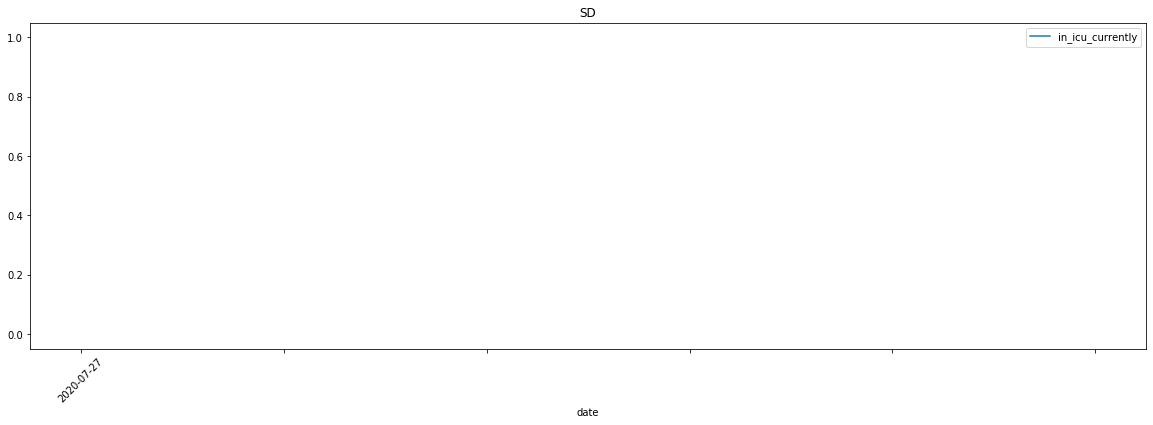

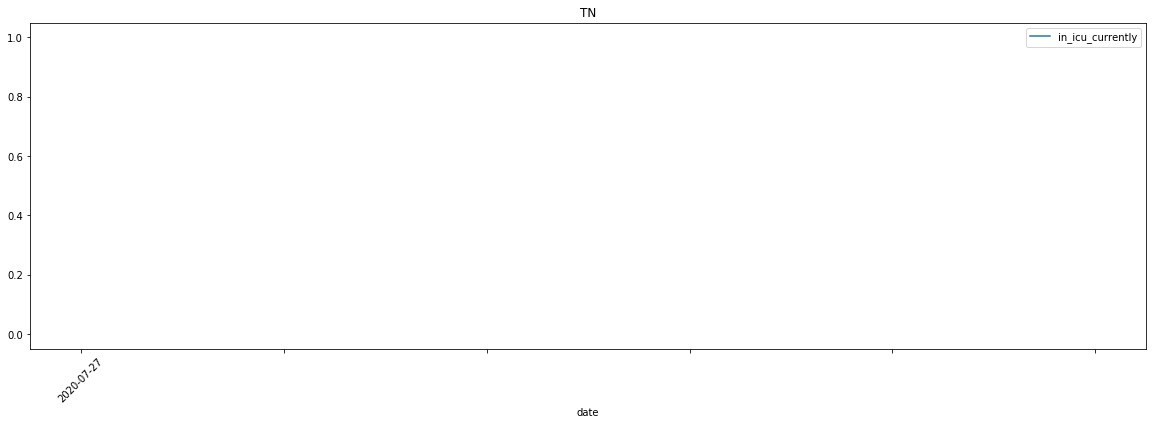

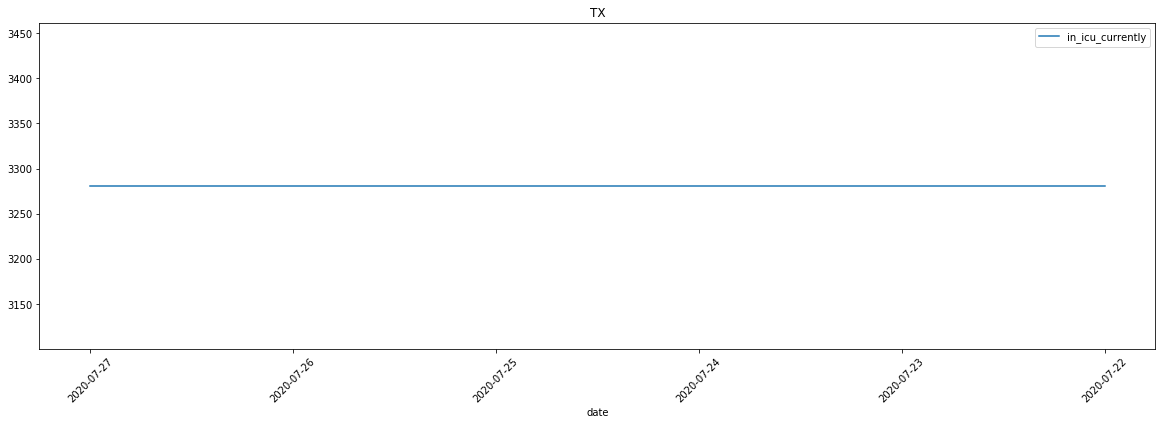

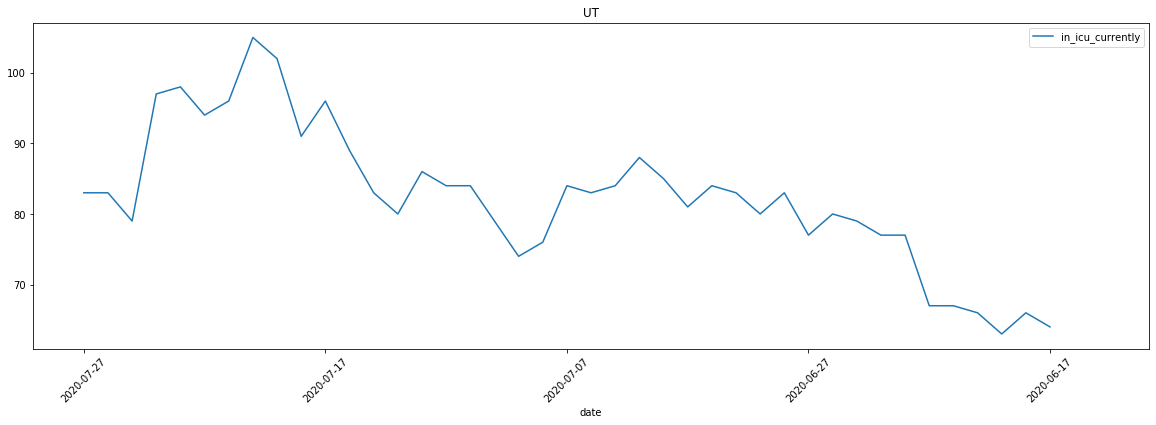

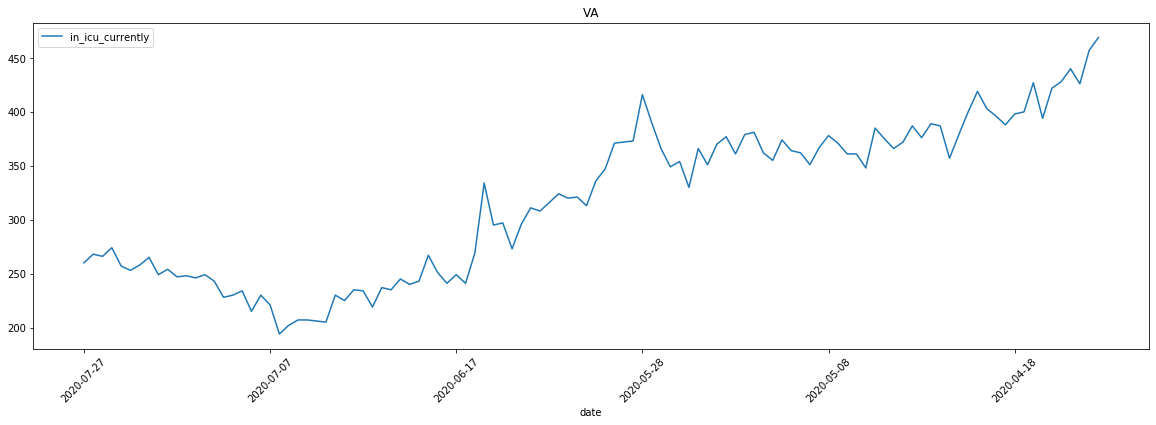

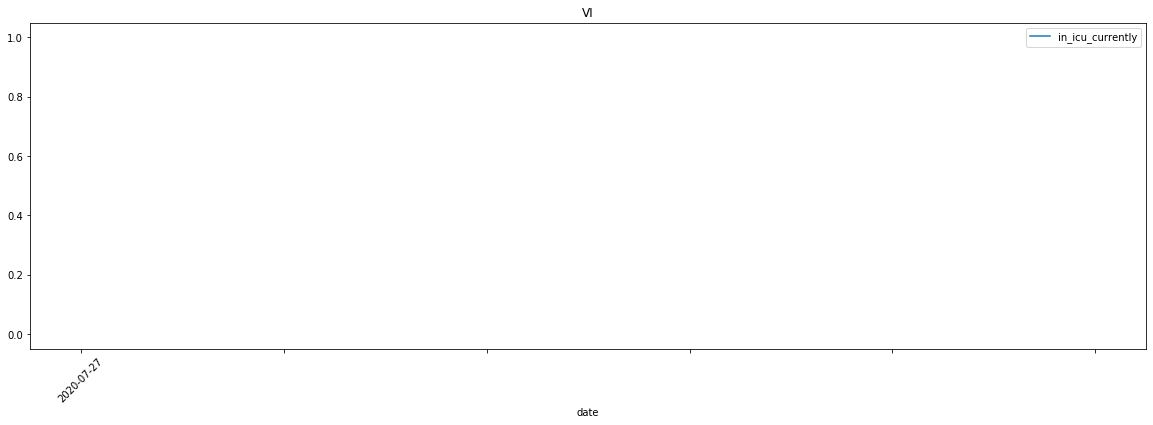

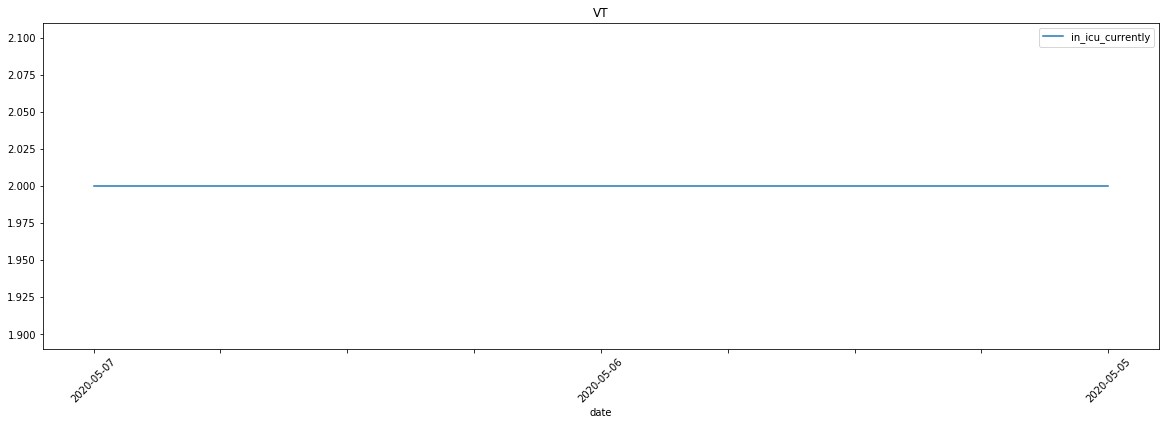

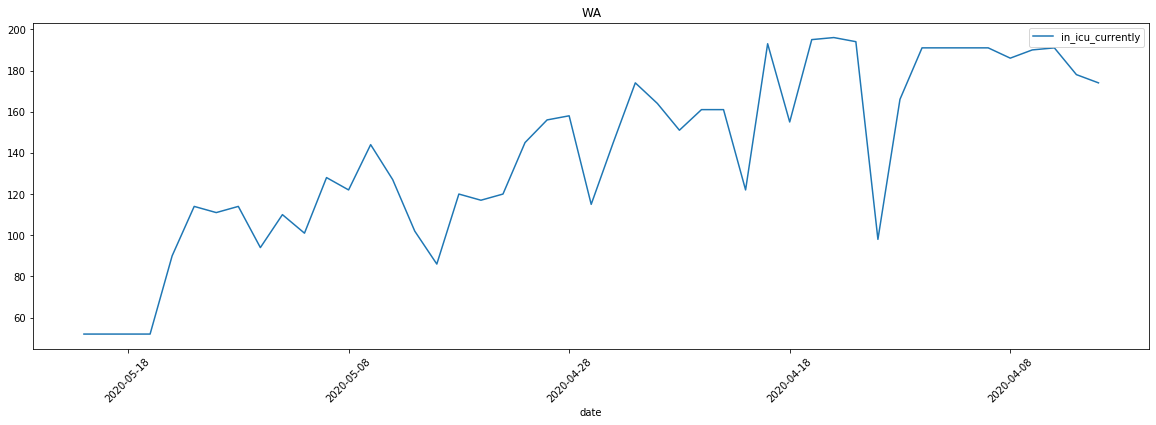

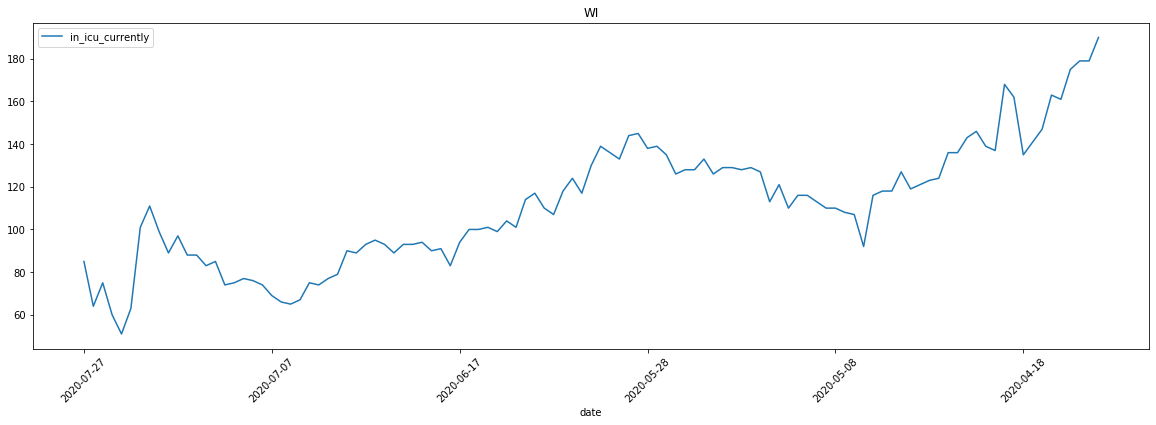

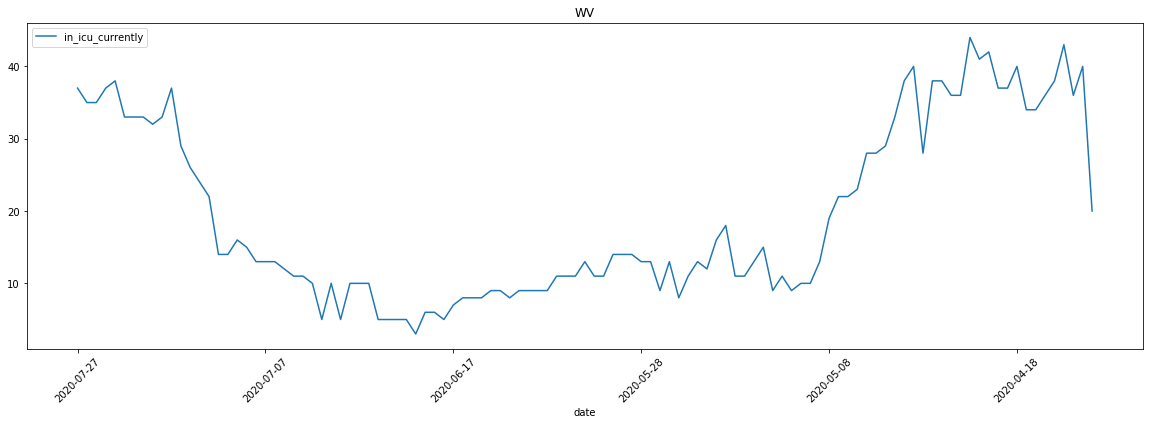

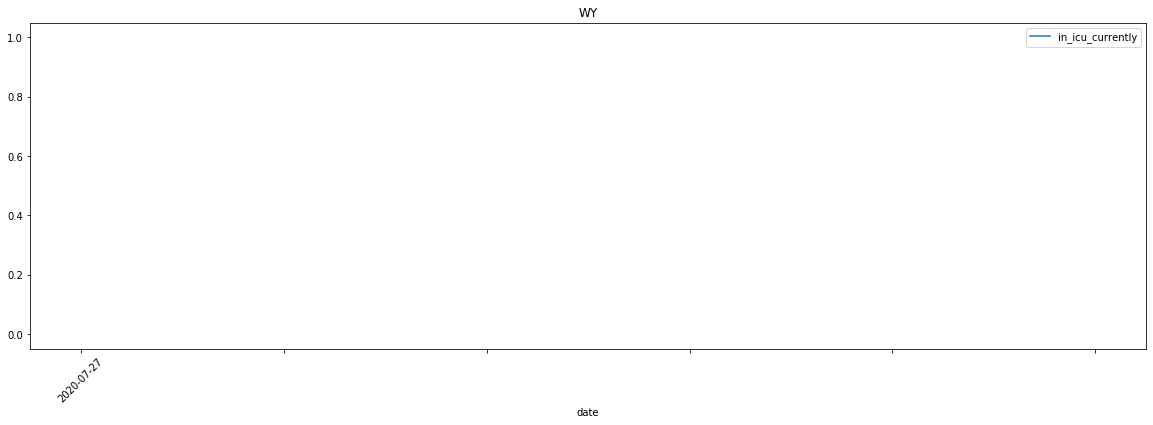

In [15]:
# Show line chart of number in ICU for each state
for state in daily_by_state_covid_df['state'].drop_duplicates():
    each_state_df = daily_by_state_covid_df[daily_by_state_covid_df['state'] == state]
    each_state_df.plot(x='date', y='in_icu_currently', figsize=(20,6), title= state)
    plt.xticks(rotation=45)
    plt.show()

# need to sort date ascending on x-axis

In [18]:
# use merge to join dataset to get total number of ICU beds
state_merged_df = daily_by_state_covid_df.merge(state_capacity_df, left_on='state', right_on='state')
# not sure if merge is needed
state_merged_df.shape

(7545, 78)

In [19]:
# create new column for available ICU beds
state_merged_df['avail_icu_beds'] = state_merged_df['total_icu_beds'] - state_merged_df['in_icu_currently']

In [20]:
state_merged_df[state_merged_df['state'] == 'TX'][['total_icu_beds']].fillna(0)

,total_icu_beds
6346,7149.0
6347,7149.0
6348,7149.0
6349,7149.0
6350,7149.0
...,...
6487,7149.0
6488,7149.0
6489,7149.0
6490,7149.0


In [21]:
state_merged_df[state_merged_df['state'] == 'TX'][['in_icu_currently']].fillna(0)

,in_icu_currently
6346,3281.0
6347,3281.0
6348,3281.0
6349,3281.0
6350,3281.0
...,...
6487,0.0
6488,0.0
6489,0.0
6490,0.0


In [22]:
state_merged_df[state_merged_df['state'] == 'TX'][['date']]

,date
6346,2020-07-27
6347,2020-07-26
6348,2020-07-25
6349,2020-07-24
6350,2020-07-23
...,...
6487,2020-03-08
6488,2020-03-07
6489,2020-03-06
6490,2020-03-05


In [ ]:
# show stacked bar chart showing number of ICU beds occupied out of Total ICU beds
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/bar_stacked.html
in_icu_currently = state_merged_df[state_merged_df['state'] == 'TX'][['in_icu_currently']]
total_icu_beds = state_merged_df[state_merged_df['state'] == 'TX'][['total_icu_beds']]#.dropna()

#ind =  state_merged_df[state_merged_df['state'] == 'TX'][['date']].values[0]   # the x locations for the groups
ind = np.arange(10)
plt.figure(figsize=(30,10))
p1 = plt.bar(ind, total_icu_beds)
p2 = plt.bar(ind, in_icu_currently, bottom=total_icu_beds)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, rotation=45)
plt.legend((p1[0], p2[0]), ('Total ICU Beds', 'In ICU'))

plt.show()

# getting error on this

In [ ]:
# stacked bar chart using seaborn
# https://randyzwitch.com/creating-stacked-bar-chart-seaborn/